In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision

In [2]:
EPOCH = 5
BATCH_SIZE = 128
LR = 0.001
DOWNLOAD_MNIST = False

In [3]:
train_data = torchvision.datasets.MNIST(root = '../mnist',
                                        train = True,
                                        transform = torchvision.transforms.ToTensor(),
                                        download = DOWNLOAD_MNIST
                                        )

test_data = torchvision.datasets.MNIST(root = '../mnist/',
                                       train = False)


torch.Size([60000, 28, 28])
torch.Size([60000])


/home/chen/anaconda3/envs/DL-module/lib/python3.10/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/chen/anaconda3/envs/DL-module/lib/python3.10/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


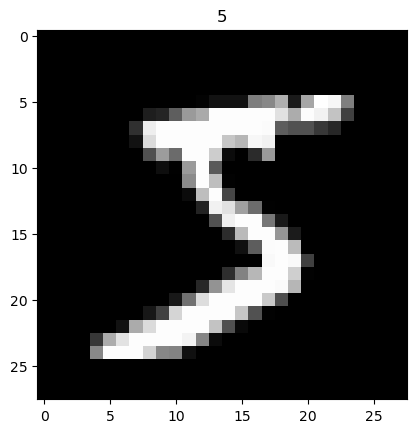

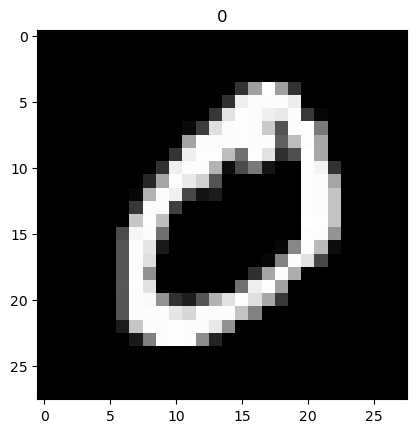

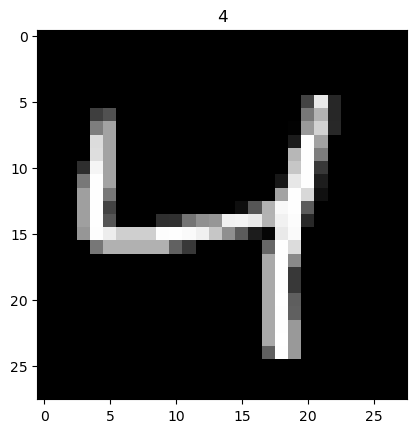

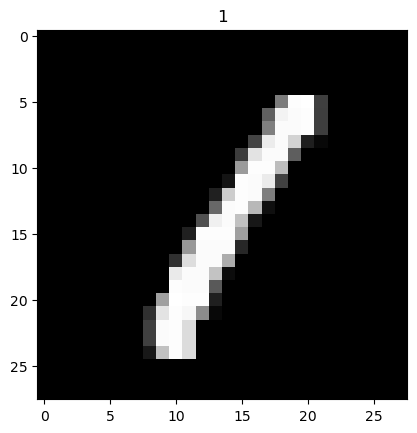

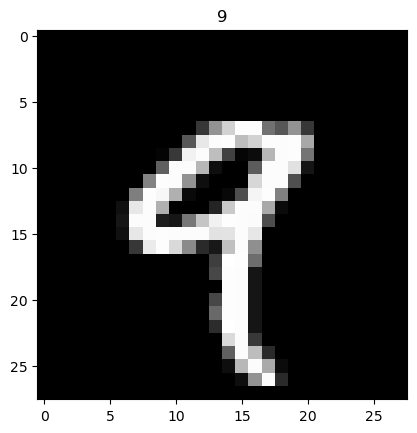

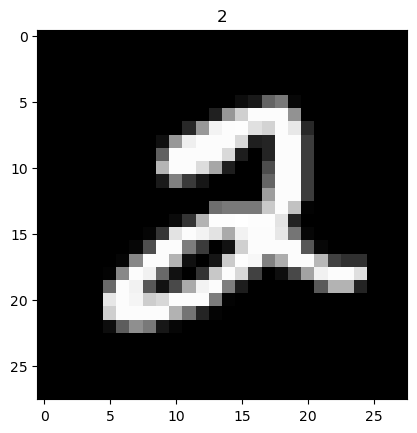

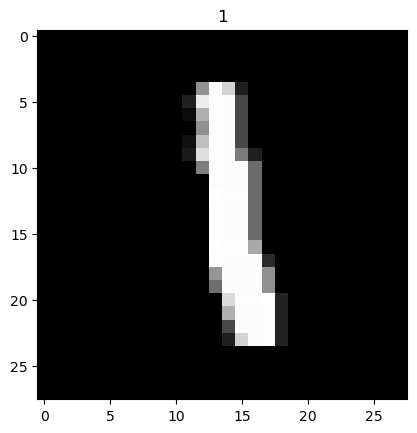

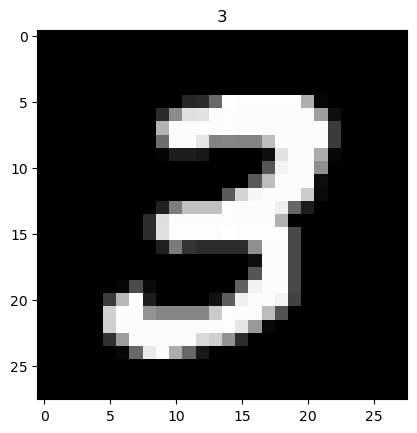

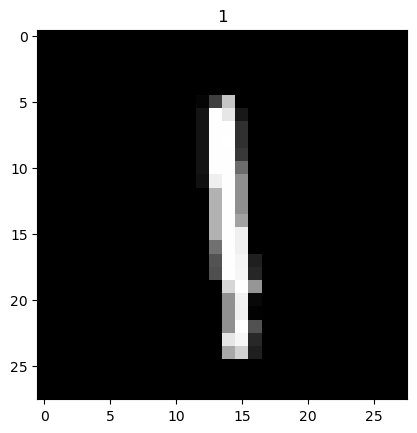

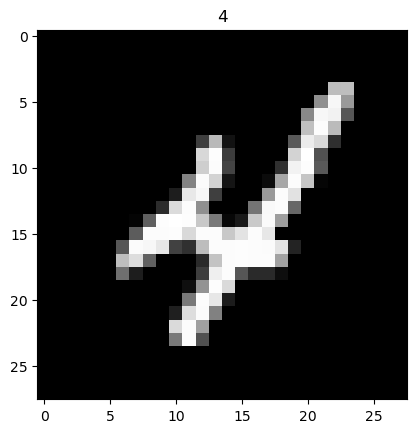

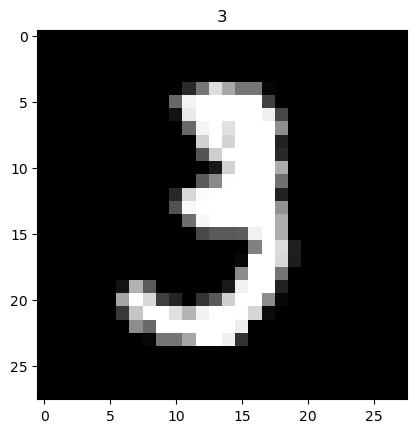

In [4]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.ion()
for i in range(11):
  plt.imshow(train_data.train_data[i].numpy(), cmap = 'gray')
  plt.title('%i' % train_data.train_labels[i])
  plt.pause(0.5)
plt.show()

In [5]:
class Dataset:
    def __init__(self, imgs, labels):
        self.imgs = imgs
        
        self.labels = labels
        
    def __getitem__(self, index: int):
        
        return self.imgs[index], self.labels[index]
    
    def __len__(self):
        return len(self.imgs)

In [6]:
train_x = train_data.train_data.float().unsqueeze(1) / 255.
train_x.shape

torch.Size([60000, 1, 28, 28])

In [7]:
datasets = Dataset(train_x, train_data.train_labels)


In [8]:
train_loader = DataLoader(dataset = datasets,
                          batch_size = BATCH_SIZE,
                          shuffle = True,
                          num_workers = 2)

In [9]:
test_x = torch.unsqueeze(test_data.test_data, dim = 1).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.test_labels[:2000]

/home/chen/anaconda3/envs/DL-module/lib/python3.10/site-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/chen/anaconda3/envs/DL-module/lib/python3.10/site-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [10]:
test_x.shape

torch.Size([2000, 1, 28, 28])

In [11]:
train_data.train_data.shape

torch.Size([60000, 28, 28])

In [12]:
from mobilenet_v1 import MobileNetV1 # 98%
from mobilenet_v2 import MobileNetV2

model = MobileNetV1(10)

In [13]:
optimization = torch.optim.Adam(model.parameters(), lr = LR)
loss_func = nn.CrossEntropyLoss()

In [14]:
train_data.train_labels

tensor([5, 0, 4,  ..., 5, 6, 8])

In [15]:
pred = model(test_x)
pred.shape

torch.Size([2000, 10])

In [16]:
pred.argmax(dim=1)

tensor([0, 8, 2,  ..., 1, 5, 0])

In [17]:
test_y.data

tensor([7, 2, 1,  ..., 3, 9, 5])

In [18]:
pred.argmax(dim=1).eq(test_y.data).sum(dim=-1)

tensor(196)

In [19]:
for epoch in range(EPOCH):
	for step, (batch_x, batch_y) in enumerate(train_loader):
		# bx = Variable(batch_x)
		# by = Variable(batch_y)

		bx = batch_x
		by = batch_y
  
		output = model(bx)
		optimization.zero_grad()
  
		loss = loss_func(output, by)
		loss.backward()

		optimization.step()

		if step % 50 == 0:
			pred = model(test_x)
			pred_y = torch.max(pred, 1)[1].data.numpy()
			accuracy = float(pred.argmax(dim=1).eq(test_y.data).sum(dim=-1)) / float(test_y.size(0))
			# accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
			print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3848 | test accuracy: 0.13
Epoch:  0 | train loss: 0.4988 | test accuracy: 0.77
Epoch:  0 | train loss: 0.5098 | test accuracy: 0.86
Epoch:  0 | train loss: 0.1821 | test accuracy: 0.89
Epoch:  0 | train loss: 0.2584 | test accuracy: 0.90
Epoch:  0 | train loss: 0.2939 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2738 | test accuracy: 0.93
Epoch:  0 | train loss: 0.2622 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0710 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1231 | test accuracy: 0.94
Epoch:  1 | train loss: 0.0422 | test accuracy: 0.94
Epoch:  1 | train loss: 0.1470 | test accuracy: 0.95
Epoch:  1 | train loss: 0.0310 | test accuracy: 0.96
Epoch:  1 | train loss: 0.0118 | test accuracy: 0.96
Epoch:  1 | train loss: 0.0848 | test accuracy: 0.96
Epoch:  1 | train loss: 0.1928 | test accuracy: 0.95
Epoch:  1 | train loss: 0.0971 | test accuracy: 0.97
Epoch:  1 | train loss: 0.1204 | test accuracy: 0.95
Epoch:  1 | train loss: 0.1988 | test accuracy

In [20]:
pred_y = model(test_x[:10]).argmax(dim=-1)
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

tensor([7, 2, 1, 0, 4, 1, 8, 8, 5, 9]) prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


In [21]:
val_pred = model(test_x).argmax(dim=-1)
val_true = test_y

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

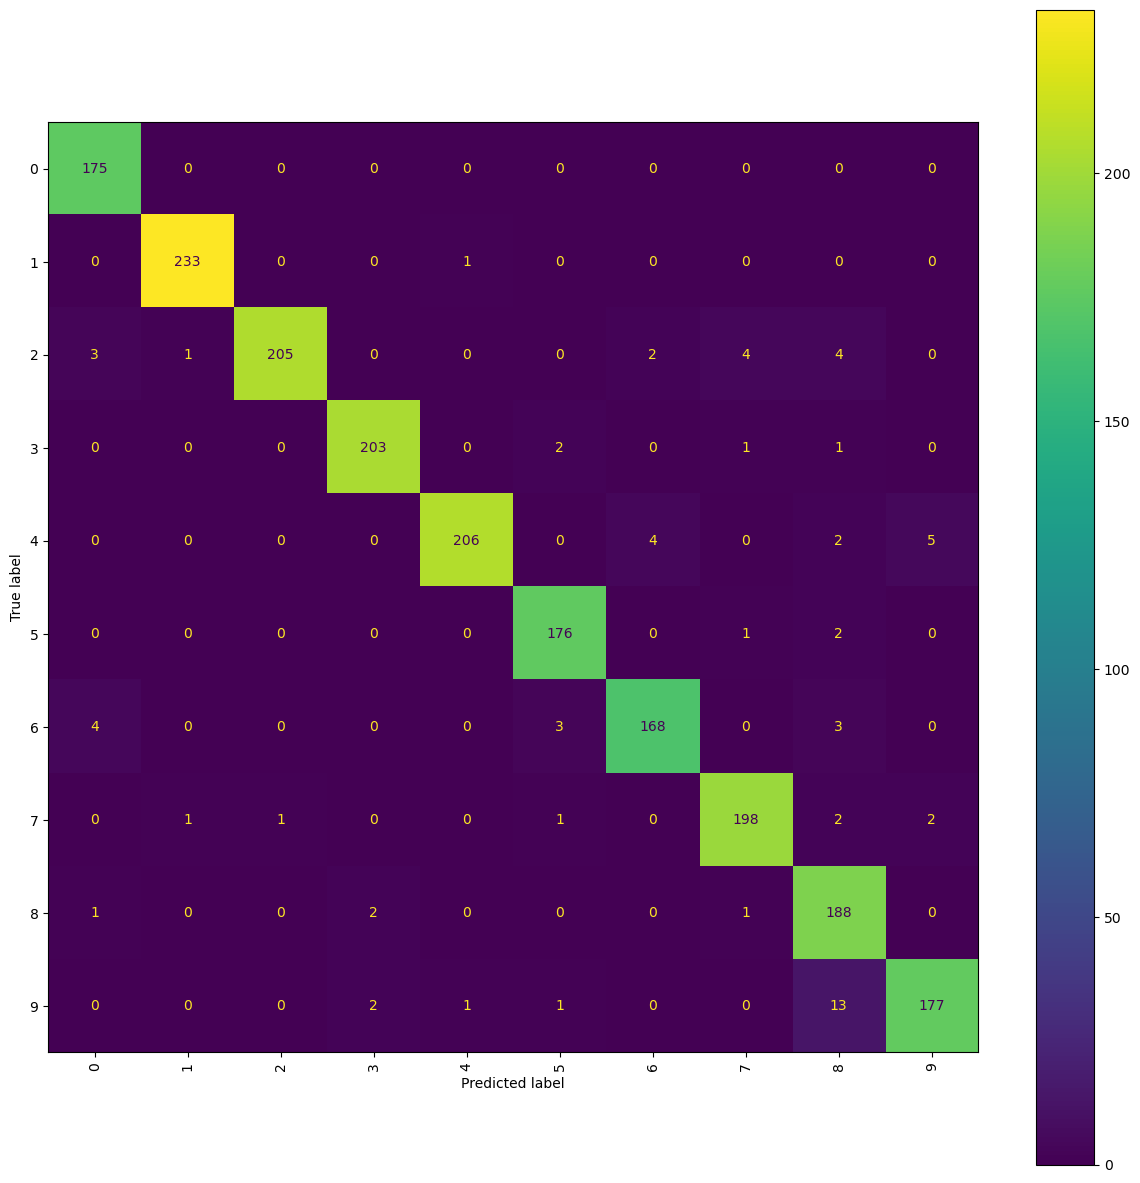

In [23]:


_, ax = plt.subplots(figsize = (15, 15))


cm = confusion_matrix(val_true, val_pred,
										labels = [x for x in range(10)])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                        display_labels = [x for x in range(10)]
                        )
disp.plot(ax = ax, xticks_rotation = 'vertical')